In [1]:
import pandas as pd
#import cv2
import numpy as np
from numpy.linalg import eig
from matplotlib import pyplot as plt
import seaborn as sns
from PIL import Image
import seaborn as sns
import functools
import operator
from sklearn.decomposition import PCA, IncrementalPCA
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity
from scipy import stats
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsOneClassifier as ovr
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# IMPORT DATA

In [2]:
# DATA LATIH
def img_read(name, n):
    arraylist = []
    for i in range(n):
        img = Image.open(r'D:\\Skripsi\\data gambar\\{} new\\{} {}.jpg'.format(name, name, str('({})'.format(i+1)))).resize((120,170))
        img_ori_array = np.asarray(img)
        img_gs = img.convert('L')
        img_gs_array = np.asarray(img_gs).reshape(-1,1).T.flatten()
        arraylist.append(img_gs_array)
    return arraylist

In [3]:
# DATA TEST
def img_read_test(name, n):
    arraylist = []
    for i in range(n):
        img = Image.open(r'D:\\Skripsi\\data gambar\\{} test\\{} {}.jpg'.format(name, name, str('({})'.format(i+1)))).resize((120,170))
        img_ori_array = np.asarray(img)
        img_gs = img.convert('L')
        img_gs_array = np.asarray(img_gs).reshape(-1,1).T.flatten()
        arraylist.append(img_gs_array)
    return arraylist

# DISPLAY SOME IMGs

In [4]:
name = 'fakhri'
i = 0

img = Image.open(r'D:\\Skripsi\\data gambar\\{} new\\{} {}.jpg'.format(name, name, str('({})'.format(i+1)))).resize((120,170))
img_ori_array = np.asarray(img)
img_gs = img.convert('L')
img_gs_array = np.asarray(img_gs).reshape(-1,1).T.flatten()
red, green, blue = img.split()






In [5]:
img_gs_array.reshape(170,120)

array([[24, 24, 24, ..., 19, 19, 18],
       [25, 25, 24, ..., 18, 18, 19],
       [24, 25, 24, ..., 18, 19, 20],
       ...,
       [26, 27, 34, ..., 65, 69, 68],
       [33, 51, 71, ..., 64, 67, 67],
       [63, 77, 80, ..., 64, 67, 67]], dtype=uint8)

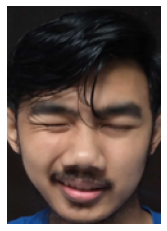

In [6]:
# Original ori image
img = plt.imshow(img)
img.set_cmap('gray')
plt.axis('off')
plt.show()

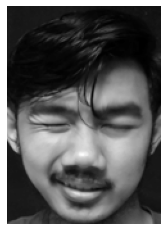

In [7]:
# Original grayscale image
img = plt.imshow(img_gs)
img.set_cmap('gray')
plt.axis('off')
plt.show()

# CREATING DATAFRAME

# DATA LATIH

In [8]:
imgdict = {'fakhri':50, 'riyo':50, 'jaka':50}
# X in form of a list
X = []
for name, n in zip(imgdict.keys(), imgdict.values()):
    X += img_read(name, n) 

X = pd.DataFrame(np.array(X))
X = X.T

In [9]:
X.shape

(20400, 150)

In [10]:
X

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,24,23,23,22,22,22,24,22,24,24,...,24,24,22,25,27,25,24,24,27,24
1,24,24,24,22,23,22,24,22,22,23,...,23,23,22,26,27,26,25,25,28,24
2,24,24,24,23,22,23,24,24,22,22,...,23,24,22,26,26,26,26,25,29,24
3,23,24,24,24,23,24,25,23,24,22,...,23,24,22,26,26,26,24,24,28,25
4,22,28,23,26,24,24,26,22,23,23,...,23,24,21,27,26,26,25,24,27,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,62,71,82,58,60,94,62,68,62,62,...,248,248,245,254,248,252,249,252,251,252
20396,61,60,62,61,61,74,62,61,66,62,...,247,225,245,254,246,253,195,252,253,212
20397,64,61,58,64,64,60,65,63,67,64,...,253,153,245,254,251,250,117,251,246,147
20398,67,67,63,66,68,60,66,67,71,64,...,254,128,243,254,253,158,116,252,150,137


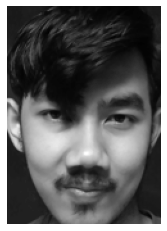

In [11]:
# Original grayscale image
img = plt.imshow(np.array(X[34]).reshape(170,120))
img.set_cmap('gray')
plt.axis('off')
plt.show()

# DATA TEST

In [12]:
imgdict = {'fakhri':20, 'riyo':20, 'jaka':20}
# X in form of a list
XTEST = []
for name, n in zip(imgdict.keys(), imgdict.values()):
    XTEST += img_read_test(name, n) 

XTEST = pd.DataFrame(np.array(XTEST))
XTEST = XTEST.T

In [13]:
XTEST.shape

(20400, 60)

In [14]:
XTEST

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,34,37,36,32,32,32,38,40,40,42,...,24,22,25,22,26,26,24,22,26,31
1,35,38,37,32,32,32,40,39,40,41,...,23,23,24,22,26,26,23,22,25,30
2,37,37,37,32,32,33,39,39,40,40,...,23,23,24,22,24,26,22,22,25,31
3,36,39,40,32,32,34,37,41,42,44,...,22,22,24,22,25,25,21,22,26,29
4,35,38,40,32,34,34,36,42,42,43,...,21,23,24,21,26,25,21,24,25,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,78,164,163,77,78,78,93,93,94,96,...,153,232,247,245,118,119,252,105,254,145
20396,82,138,129,77,77,78,92,93,96,96,...,138,161,191,245,115,118,252,110,254,144
20397,71,96,90,77,76,79,92,95,96,98,...,140,134,138,245,114,117,254,114,255,145
20398,71,77,76,77,78,80,93,95,95,100,...,134,133,137,243,118,118,201,113,254,147


# UJI ASUMSI

# Uji KMO

In [15]:
kmo_all,kmo_score = calculate_kmo(X)
kmo_score

C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\linalg\linalg.py:2159: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)
C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


0.9883328147030954

In [16]:
chi_square_value,p_value = calculate_bartlett_sphericity(X)
chi_square_value, p_value

(9796742.028619982, 0.0)

In [17]:
np.linalg.det(X.corr())

6.522519983587854e-208

# PCA

In [18]:
#LATIH

# NORMALIZATION
# Mean per column
mean_per_row = [X.loc[row].mean() for row in X.index ]

# Normalization
A = []
for col in range(len(X.columns)):
    A.append(X[col] - mean_per_row)
A = pd.DataFrame(np.array(A)).T
A.loc[:, 0:1]

,0,1
0,-2.746667,-3.746667
1,-2.813333,-2.813333
2,-2.920000,-2.920000
3,-3.993333,-2.993333
4,-5.546667,0.453333
...,...,...
20395,-66.706667,-57.706667
20396,-65.186667,-66.186667
20397,-57.220000,-60.220000
20398,-48.573333,-48.573333


In [19]:
mean_per_row[-1]

110.69333333333333

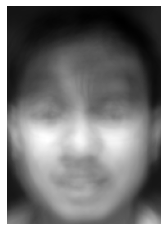

In [20]:
img = plt.imshow(np.asarray(mean_per_row).reshape(170,120))
img.set_cmap('gray')
plt.axis('off')
plt.show()


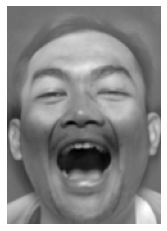

In [21]:
# Normalization grayscale image
img = plt.imshow(np.array(A[149]).reshape(170,120))
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [22]:
# Covariance Matrix A
C = np.matmul(A.T, A)
C

C:\Users\AHNAFB~1\AppData\Local\Temp/ipykernel_14556/2378593078.py:2: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  C = np.matmul(A.T, A)


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,2.593960e+07,1.822029e+07,1.560794e+07,1.916479e+07,1.359936e+07,1.636088e+07,7.751450e+06,1.286671e+07,1.233413e+07,1.068078e+07,...,-4.764220e+06,-1.174603e+07,-9.423546e+06,-9.781986e+06,-7.738137e+06,-9.117573e+06,-4.825552e+06,-5.743526e+06,-5.374689e+06,-1.110373e+07
1,1.822029e+07,2.366827e+07,1.480008e+07,1.839777e+07,1.738343e+07,1.741462e+07,8.013554e+06,1.402157e+07,1.647737e+07,1.357469e+07,...,-4.837172e+06,-1.063884e+07,-9.515991e+06,-8.534218e+06,-7.688084e+06,-8.948204e+06,-5.157952e+06,-5.279809e+06,-5.835760e+06,-1.297862e+07
2,1.560794e+07,1.480008e+07,2.187894e+07,1.517552e+07,1.425058e+07,1.394472e+07,1.175049e+07,1.276490e+07,1.540133e+07,1.255247e+07,...,-4.354080e+06,-1.003789e+07,-8.364883e+06,-9.829774e+06,-8.272632e+06,-9.568977e+06,-6.636459e+06,-5.930769e+06,-6.745473e+06,-1.014983e+07
3,1.916479e+07,1.839777e+07,1.517552e+07,2.600365e+07,1.801857e+07,1.836707e+07,6.946881e+06,1.266887e+07,1.637326e+07,1.261012e+07,...,-6.230253e+06,-1.280974e+07,-1.029612e+07,-9.945557e+06,-8.411281e+06,-9.873169e+06,-5.898143e+06,-5.945177e+06,-6.749646e+06,-1.315833e+07
4,1.359936e+07,1.738343e+07,1.425058e+07,1.801857e+07,2.393255e+07,1.597868e+07,1.167361e+07,1.392505e+07,1.916466e+07,1.637586e+07,...,-3.882763e+06,-9.192943e+06,-6.555156e+06,-6.672860e+06,-5.961203e+06,-6.956538e+06,-4.877825e+06,-2.872895e+06,-4.382104e+06,-9.871332e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-9.117573e+06,-8.948204e+06,-9.568977e+06,-9.873169e+06,-6.956538e+06,-5.040391e+06,-2.695342e+06,-5.601110e+06,-6.101960e+06,-5.445680e+06,...,8.494646e+06,1.468864e+07,1.919983e+07,1.840875e+07,1.323303e+07,2.700048e+07,1.326601e+07,1.860626e+07,1.809933e+07,1.806738e+07
146,-4.825552e+06,-5.157952e+06,-6.636459e+06,-5.898143e+06,-4.877825e+06,-2.978935e+06,-1.804533e+06,-3.245589e+06,-4.487112e+06,-3.183702e+06,...,6.830175e+06,1.153029e+07,9.105996e+06,9.931695e+06,1.031458e+07,1.326601e+07,1.744551e+07,1.150617e+07,1.354737e+07,9.519386e+06
147,-5.743526e+06,-5.279809e+06,-5.930769e+06,-5.945177e+06,-2.872895e+06,-2.840352e+06,5.380914e+05,-3.153400e+06,-2.903295e+06,-1.598367e+06,...,1.114325e+07,1.438845e+07,1.568733e+07,2.190612e+07,1.354691e+07,1.860626e+07,1.150617e+07,2.590731e+07,1.398958e+07,1.685307e+07
148,-5.374689e+06,-5.835760e+06,-6.745473e+06,-6.749646e+06,-4.382104e+06,-2.489398e+06,-9.458764e+05,-3.574866e+06,-4.365298e+06,-2.916302e+06,...,8.772777e+06,1.230523e+07,1.282211e+07,1.267887e+07,1.110655e+07,1.809933e+07,1.354737e+07,1.398958e+07,2.579915e+07,1.417191e+07


In [23]:
# Eigen value & Eigen Vector
eigen_values, eigen_vectors = eig(C)
V = pd.DataFrame(eigen_vectors)
V

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.090952,-0.050719,0.092993,0.013169,-0.080039,0.024254,-0.095105,0.015873,-0.058378,0.045979,...,-0.007977,0.014501,0.028016,-0.072471,-0.014693,0.011955,0.047991,-0.060258,-0.000638,-0.001283
1,0.093911,-0.051303,0.116875,0.048418,-0.080489,-0.003061,-0.076586,0.005609,0.015717,0.059284,...,0.064647,0.044591,0.033812,-0.042209,0.070513,0.045249,-0.032536,-0.018676,0.031034,-0.119637
2,0.093784,-0.059612,0.050962,0.077267,-0.028982,0.030107,-0.013116,0.023240,-0.006435,-0.058565,...,-0.024385,0.016491,0.171869,0.170090,0.085462,0.065399,0.024623,-0.111664,-0.049223,0.208963
3,0.104831,-0.062859,0.095826,-0.006196,-0.056177,0.023363,-0.082914,0.019820,-0.017557,0.086854,...,0.060021,-0.113392,0.030150,-0.052245,-0.239796,-0.135923,-0.154869,0.190626,-0.153535,-0.247074
4,0.092420,-0.088524,0.071794,0.061708,-0.023106,-0.029883,-0.036709,0.028636,0.054140,0.056744,...,-0.118415,-0.070718,0.005735,0.106653,0.133200,0.133607,-0.053670,0.046492,-0.117127,0.234590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-0.105679,-0.049965,0.033764,0.031501,0.101829,-0.039753,-0.076560,-0.005770,-0.072890,0.157315,...,-0.090461,0.020658,0.114817,0.052240,0.103832,0.046307,-0.027125,0.233703,0.027248,0.021111
146,-0.070407,-0.023305,0.038987,0.019756,0.012335,-0.073318,0.000628,-0.076795,-0.118435,0.138978,...,0.040576,-0.090534,-0.088146,0.029326,0.054631,0.014032,0.029269,-0.117847,-0.068387,0.020585
147,-0.081308,-0.071450,0.036447,0.049960,0.123591,-0.081199,-0.106242,-0.120505,-0.031762,0.052960,...,-0.008997,0.043255,-0.022714,-0.049725,-0.080402,-0.014947,-0.005021,-0.093909,0.031019,-0.008969
148,-0.075523,-0.039108,0.041102,0.035608,0.083437,-0.108975,-0.040941,-0.075702,-0.185679,0.157485,...,0.113010,-0.220382,0.000296,0.105267,0.090763,-0.028039,-0.009708,-0.031641,-0.110905,-0.112868


In [24]:
V[[14]]

,14
0,-0.061741
1,0.059566
2,-0.041875
3,-0.022556
4,0.026151
...,...
145,-0.035998
146,-0.093213
147,-0.004274
148,-0.109688


In [25]:
pd.DataFrame(eigen_values).sort_values(by=0, ascending=False).head(5)

,0
0,1.126987e+09
1,7.189793e+08
2,2.857831e+08
3,2.105923e+08
4,1.648463e+08


In [26]:
pd.DataFrame(eigen_values).sort_values(by=0, ascending=False).tail(5)

,0
81,2.500224e+05
80,2.347157e+05
122,1.179725e-09
121,-7.395309e-10
112,-2.897690e-08


In [27]:
eigen_values.sum()

4331128265.373333

In [28]:
# Sort descendingly the eigen vectors
desc_V = pd.concat([
    V.T, pd.DataFrame(eigen_values, columns=['eigen_values'])
], axis=1)
desc_V = desc_V.sort_values(by='eigen_values', ascending=False)
desc_V = desc_V.drop('eigen_values', axis=1)
#desc_V = desc_V[:]
desc_V = desc_V.T
desc_V

,0,1,2,3,4,5,6,7,8,10,...,102,101,89,88,87,81,80,122,121,112
0,0.090952,-0.050719,0.092993,0.013169,-0.080039,0.024254,-0.095105,0.015873,-0.058378,-0.005614,...,0.012073,-0.044732,-0.007679,0.005212,-0.012079,-0.006603,0.013773,-0.000566,-0.003948,0.08165
1,0.093911,-0.051303,0.116875,0.048418,-0.080489,-0.003061,-0.076586,0.005609,0.015717,0.006207,...,-0.118706,-0.031959,0.003205,-0.012934,0.002393,0.003090,-0.001306,-0.000566,-0.003948,0.08165
2,0.093784,-0.059612,0.050962,0.077267,-0.028982,0.030107,-0.013116,0.023240,-0.006435,0.051688,...,0.033756,0.080743,-0.017526,-0.012121,0.016969,0.006694,-0.001825,-0.000566,-0.003948,0.08165
3,0.104831,-0.062859,0.095826,-0.006196,-0.056177,0.023363,-0.082914,0.019820,-0.017557,-0.003801,...,-0.020535,0.009819,0.005562,0.009028,0.009669,-0.000332,-0.003006,-0.000566,-0.003948,0.08165
4,0.092420,-0.088524,0.071794,0.061708,-0.023106,-0.029883,-0.036709,0.028636,0.054140,-0.013592,...,-0.118425,0.025514,0.018832,0.013478,-0.004507,-0.000606,0.004450,-0.000566,-0.003948,0.08165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-0.105679,-0.049965,0.033764,0.031501,0.101829,-0.039753,-0.076560,-0.005770,-0.072890,-0.062752,...,-0.028760,-0.010165,-0.036375,0.010480,-0.010873,0.002731,-0.004185,-0.000566,-0.003948,0.08165
146,-0.070407,-0.023305,0.038987,0.019756,0.012335,-0.073318,0.000628,-0.076795,-0.118435,-0.032905,...,-0.028530,0.028985,-0.022144,0.007360,-0.016964,0.002770,-0.001550,-0.000566,-0.003948,0.08165
147,-0.081308,-0.071450,0.036447,0.049960,0.123591,-0.081199,-0.106242,-0.120505,-0.031762,-0.043144,...,-0.000909,0.000874,0.029008,-0.017587,0.001324,-0.001150,-0.003418,-0.000566,-0.003948,0.08165
148,-0.075523,-0.039108,0.041102,0.035608,0.083437,-0.108975,-0.040941,-0.075702,-0.185679,-0.049366,...,-0.022552,0.028424,-0.006778,-0.018551,-0.012058,-0.001668,0.006034,-0.000566,-0.003948,0.08165


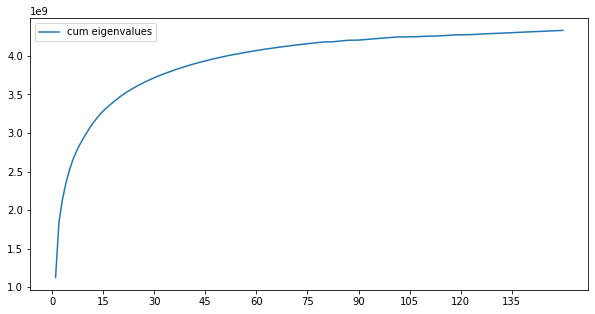

In [29]:
# Cumulative eigen value on number of variables plot 

ei_val = pd.DataFrame(eigen_values)
cum_eigval = pd.DataFrame(ei_val.cumsum())
vars = pd.DataFrame([x+1 for x in range(len(V))], columns=['cumulative columns'])
screedf = pd.concat([cum_eigval, vars], axis=1)

plt.figure(figsize=[10,5])
plt.plot(screedf['cumulative columns'], screedf[0], label='cum eigenvalues')
plt.xticks(np.arange(0,150,15))
plt.legend()

C:\Users\AHNAFB~1\AppData\Local\Temp/ipykernel_14556/550016622.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(screedf['cumulative columns'], screedf[0], lineStyle='-')


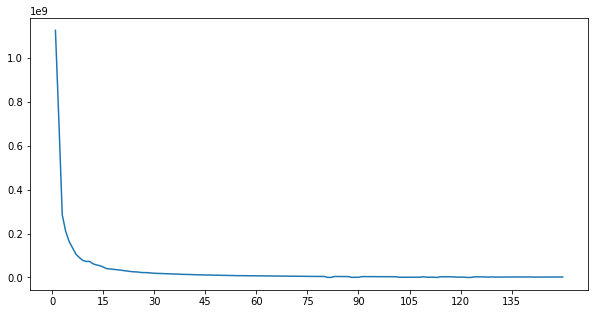

In [30]:
# eigen values per row
descsorted_eigvals = ei_val.sort_values(by=0, ascending=False)
screedf = pd.concat([
    pd.DataFrame([x+1 for x in range(len(V))], columns=['cumulative columns']),
    descsorted_eigvals
], axis=1)

plt.figure(figsize=[10,5])
plt.plot(screedf['cumulative columns'], screedf[0], lineStyle='-')
plt.xticks(np.arange(0,150,15))
plt.xlabel
plt.show()

In [31]:
# Variance from 15 PCs

eigval = descsorted_eigvals[:148].reset_index(drop=True)

var = 0
for i in range(15):
    var += eigval[0][i]/eigval.sum()

var

0    0.758834
dtype: float64

In [32]:
# Selecting first 20 eigenvalues
# BELUM DIPAKE

V_new = desc_V.loc[:, :14]
V_new

,0,1,2,3,4,5,6,7,8,10,9,11,12,13,14
0,0.090952,-0.050719,0.092993,0.013169,-0.080039,0.024254,-0.095105,0.015873,-0.058378,-0.005614,0.045979,0.048071,0.131209,0.089061,-0.061741
1,0.093911,-0.051303,0.116875,0.048418,-0.080489,-0.003061,-0.076586,0.005609,0.015717,0.006207,0.059284,-0.062534,0.043418,0.022576,0.059566
2,0.093784,-0.059612,0.050962,0.077267,-0.028982,0.030107,-0.013116,0.023240,-0.006435,0.051688,-0.058565,0.034318,0.093143,0.020661,-0.041875
3,0.104831,-0.062859,0.095826,-0.006196,-0.056177,0.023363,-0.082914,0.019820,-0.017557,-0.003801,0.086854,-0.056567,0.032387,0.076990,-0.022556
4,0.092420,-0.088524,0.071794,0.061708,-0.023106,-0.029883,-0.036709,0.028636,0.054140,-0.013592,0.056744,-0.095542,-0.011200,-0.016811,0.026151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-0.105679,-0.049965,0.033764,0.031501,0.101829,-0.039753,-0.076560,-0.005770,-0.072890,-0.062752,0.157315,0.085270,-0.042298,-0.090755,-0.035998
146,-0.070407,-0.023305,0.038987,0.019756,0.012335,-0.073318,0.000628,-0.076795,-0.118435,-0.032905,0.138978,0.052676,0.054042,-0.038027,-0.093213
147,-0.081308,-0.071450,0.036447,0.049960,0.123591,-0.081199,-0.106242,-0.120505,-0.031762,-0.043144,0.052960,0.023925,-0.036368,-0.040323,-0.004274
148,-0.075523,-0.039108,0.041102,0.035608,0.083437,-0.108975,-0.040941,-0.075702,-0.185679,-0.049366,0.157485,0.081621,0.053656,-0.068564,-0.109688


# EIGENFACES

In [33]:
# eigenfaces matrix calculation
mu = []
for i in V_new.columns:
    mu.append(np.matmul(A,desc_V[i]))

mu = pd.DataFrame(np.array(mu).T)
mu

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,10.511091,36.497552,0.451776,8.863687,0.679238,-19.455152,6.460568,2.556593,6.121824,-6.227406,5.154097,13.979438,-14.600255,4.035842,9.923519
1,10.937426,35.456729,-1.605462,5.901999,2.842226,-19.206876,7.554100,2.231672,7.487406,-6.977946,6.235285,16.075853,-14.792304,4.512332,10.931219
2,10.821718,35.751056,-2.755347,3.724907,4.540897,-21.251456,7.598061,3.137901,9.176101,-7.451769,6.290003,17.438386,-15.317223,4.739902,10.662615
3,10.631450,35.678609,-4.083311,5.169312,4.553647,-20.382026,7.392459,5.009049,9.511121,-5.647570,6.188498,15.883000,-13.492892,6.385960,11.022176
4,18.139337,23.758689,-19.581751,12.384784,10.861866,-14.231914,13.848601,1.436819,9.763217,-2.635242,14.502298,8.427721,-18.375960,12.721645,13.603492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,-616.373815,-134.168796,167.826315,2.975964,333.845808,-124.957939,-140.366309,-176.584109,-55.095242,37.595819,-147.027630,4.517891,-17.751757,-3.680240,-59.941541
20396,-622.690897,-114.602760,146.207447,-12.962741,315.482583,-96.560648,-125.697865,-181.119146,-47.848844,50.151580,-142.238254,0.308756,-22.447589,-19.692630,-24.068586
20397,-586.322997,-98.126278,129.414606,-42.182684,282.819724,-51.767121,-105.125932,-195.396993,11.488683,75.243177,-94.253379,5.923502,-50.826376,-54.611012,23.499034
20398,-501.715628,-67.975550,107.675665,-43.829485,241.491929,-23.676230,-74.712210,-181.566762,76.355364,60.975196,-86.825046,-8.695872,-54.865771,-49.935813,39.302634


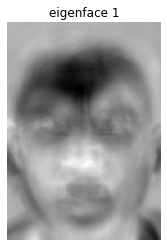

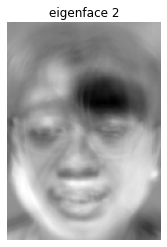

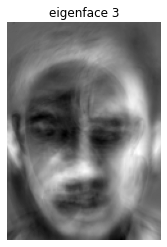

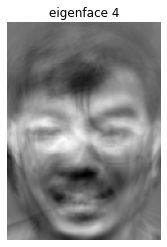

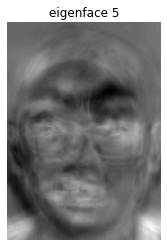

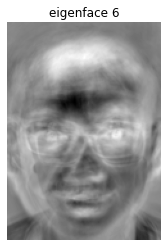

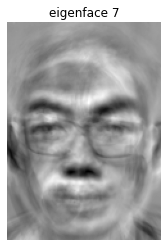

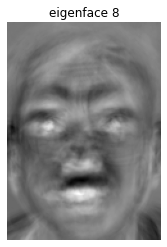

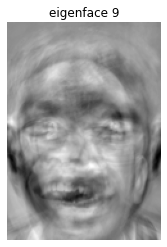

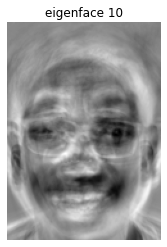

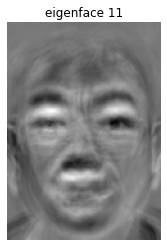

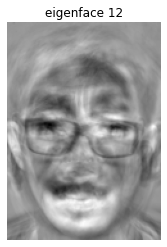

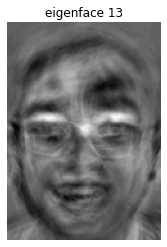

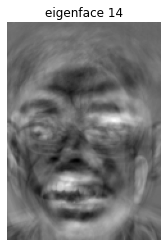

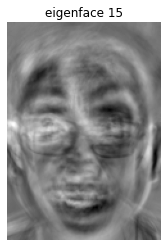

In [34]:
for i in range(15):
    img = plt.imshow(np.array(mu[i]).reshape(170,120))
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('eigenface {}'.format(str(i+1)))
    plt.show()

# EIGENSPACE

In [35]:
omega = []

for i in A.columns:
    omega.append(np.matmul(mu.T, A[i]))

omega = pd.DataFrame(np.array(omega).T)
omega

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,1.025013e+08,1.058367e+08,1.056932e+08,1.181432e+08,1.041561e+08,8.046507e+07,5.226165e+07,7.472511e+07,9.179448e+07,7.509346e+07,...,-7.612056e+07,-1.410358e+08,-1.287164e+08,-1.311495e+08,-1.019873e+08,-1.190990e+08,-7.934778e+07,-9.163265e+07,-8.511294e+07,-1.493040e+08
1,-3.646581e+07,-3.688575e+07,-4.285977e+07,-4.519456e+07,-6.364679e+07,-5.227540e+07,-6.376788e+07,-4.262027e+07,-5.794780e+07,-5.377182e+07,...,-3.131081e+07,-3.219171e+07,-5.149850e+07,-4.650616e+07,-2.502045e+07,-3.592385e+07,-1.675589e+07,-5.137099e+07,-2.811801e+07,-4.775968e+07
2,2.657580e+07,3.340086e+07,1.456398e+07,2.738543e+07,2.051745e+07,2.949400e+07,-2.594622e+06,1.575760e+07,2.374392e+07,1.484639e+07,...,1.455497e+07,1.442836e+07,8.972524e+06,2.047930e+07,1.550330e+07,9.649292e+06,1.114189e+07,1.041594e+07,1.174626e+07,-1.492583e+06
3,2.773301e+06,1.019650e+07,1.627188e+07,-1.304917e+06,1.299522e+07,1.867961e+07,3.030234e+07,2.185498e+07,2.413358e+07,2.218668e+07,...,9.554342e+05,1.334157e+06,4.271174e+06,2.105869e+06,5.456183e+06,6.633929e+06,4.160376e+06,1.052121e+07,7.498765e+06,9.662846e+06
4,-1.319420e+07,-1.326832e+07,-4.777639e+06,-9.260625e+06,-3.808942e+06,-1.762884e+07,-7.996990e+06,-2.130206e+07,-9.525675e+06,-1.272288e+07,...,-1.659955e+06,-3.271403e+05,1.679087e+07,2.469355e+07,1.730980e+07,1.678619e+07,2.033325e+06,2.037353e+07,1.375434e+07,1.716435e+07
5,3.300451e+06,-4.164896e+05,4.096867e+06,3.179205e+06,-4.066336e+06,-3.578596e+06,-2.053372e+06,-3.189535e+06,-6.052116e+06,-6.054299e+06,...,-2.105822e+07,-1.248238e+07,2.214970e+06,3.305781e+06,-2.272935e+06,-5.409510e+06,-9.976931e+06,-1.104941e+07,-1.482904e+07,-2.002795e+06
6,-1.012184e+07,-8.150847e+06,-1.395887e+06,-8.824389e+06,-3.906802e+06,-6.104788e+06,8.876927e+06,-7.726186e+06,-2.418259e+06,-1.147016e+06,...,3.725258e+06,1.146601e+07,-2.543742e+06,-6.415812e+06,-1.590757e+06,-8.148088e+06,6.680284e+04,-1.130710e+07,-4.357233e+06,-3.790909e+05
7,1.447963e+06,5.116428e+05,2.119967e+06,1.807985e+06,2.612174e+06,7.580250e+06,-4.758074e+06,-9.082459e+05,6.512247e+06,-3.225810e+06,...,-1.027298e+07,-6.737814e+06,2.001863e+07,-1.196916e+07,-1.398865e+07,-5.263767e+05,-7.005302e+06,-1.099255e+07,-6.905592e+06,1.747615e+07
8,-4.555829e+06,1.226558e+06,-5.021984e+05,-1.370136e+06,4.225155e+06,-2.982173e+06,7.040982e+05,-3.597488e+06,4.975665e+06,5.634545e+05,...,-5.268018e+06,8.063791e+05,-4.446959e+03,7.392495e+06,9.707532e+05,-5.688416e+06,-9.242740e+06,-2.478701e+06,-1.449056e+07,-2.383350e+06
9,-4.112985e+05,4.547181e+05,3.786864e+06,-2.784816e+05,-9.958140e+05,3.891570e+06,3.843622e+05,2.359292e+06,2.564253e+06,-8.291616e+05,...,8.255621e+06,-8.629694e+05,-2.228558e+06,1.458901e+06,-3.746432e+06,-4.597413e+06,-2.410741e+06,-3.160878e+06,-3.616711e+06,-6.872202e+06


In [36]:
imgdicttrain = {'fakhri':50, 'riyo':50, 'jaka':50}
Xtrain = omega.T

ytrain=[]
for name, n in zip(imgdicttrain.keys(), imgdicttrain.values()):
    ytrain += [name for x in range(n)]

ytrain = pd.DataFrame(ytrain, columns=['label'])


In [37]:
#Xtrain.to_excel(r'D:\\Skripsi\\data wajah.xlsx')

In [38]:
ytrain.shape

(150, 1)

In [39]:
Xtrain.loc[147:149, [0,1,14]].head()

,0,1,14
147,-9.163265e+07,-5.137099e+07,-2.040358e+05
148,-8.511294e+07,-2.811801e+07,-5.236453e+06
149,-1.493040e+08,-4.775968e+07,-2.039544e+06


# PCA DATA TEST

In [40]:
calculate_bartlett_sphericity(XTEST)

(1766512.0792941868, 0.0)

In [41]:
np.linalg.det(XTEST.corr())

2.258426156957196e-38

In [42]:
kmo_all,kmo_score = calculate_kmo(XTEST)
kmo_score

0.9692235246801972

In [43]:

# NORMALIZATION
# Mean per column
mean_per_rowtest = [XTEST.loc[row].mean() for row in XTEST.index ]

# Normalization
Atest = []
for col in range(len(XTEST.columns)):
    Atest.append(XTEST[col] - mean_per_rowtest)
Atest = pd.DataFrame(np.array(Atest)).T
Atest

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,7.000000,10.000000,9.000000,5.000000,5.000000,5.000000,11.000000,13.000000,13.000000,15.000000,...,-3.000000,-5.000000,-2.000000,-5.000000,-1.000000,-1.000000,-3.000000,-5.000000,-1.000000,4.000000
1,8.216667,11.216667,10.216667,5.216667,5.216667,5.216667,13.216667,12.216667,13.216667,14.216667,...,-3.783333,-3.783333,-2.783333,-4.783333,-0.783333,-0.783333,-3.783333,-4.783333,-1.783333,3.216667
2,9.933333,9.933333,9.933333,4.933333,4.933333,5.933333,11.933333,11.933333,12.933333,12.933333,...,-4.066667,-4.066667,-3.066667,-5.066667,-3.066667,-1.066667,-5.066667,-5.066667,-2.066667,3.933333
3,7.950000,10.950000,11.950000,3.950000,3.950000,5.950000,8.950000,12.950000,13.950000,15.950000,...,-6.050000,-6.050000,-4.050000,-6.050000,-3.050000,-3.050000,-7.050000,-6.050000,-2.050000,0.950000
4,6.800000,9.800000,11.800000,3.800000,5.800000,5.800000,7.800000,13.800000,13.800000,14.800000,...,-7.200000,-5.200000,-4.200000,-7.200000,-2.200000,-3.200000,-7.200000,-4.200000,-3.200000,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20395,-39.750000,46.250000,45.250000,-40.750000,-39.750000,-39.750000,-24.750000,-24.750000,-23.750000,-21.750000,...,35.250000,114.250000,129.250000,127.250000,0.250000,1.250000,134.250000,-12.750000,136.250000,27.250000
20396,-34.450000,21.550000,12.550000,-39.450000,-39.450000,-38.450000,-24.450000,-23.450000,-20.450000,-20.450000,...,21.550000,44.550000,74.550000,128.550000,-1.450000,1.550000,135.550000,-6.450000,137.550000,27.550000
20397,-43.333333,-18.333333,-24.333333,-37.333333,-38.333333,-35.333333,-22.333333,-19.333333,-18.333333,-16.333333,...,25.666667,19.666667,23.666667,130.666667,-0.333333,2.666667,139.666667,-0.333333,140.666667,30.666667
20398,-41.333333,-35.333333,-36.333333,-35.333333,-34.333333,-32.333333,-19.333333,-17.333333,-17.333333,-12.333333,...,21.666667,20.666667,24.666667,130.666667,5.666667,5.666667,88.666667,0.666667,141.666667,34.666667


In [44]:
omegatest = []

for i in Atest.columns:
    omegatest.append(np.matmul(mu.T, Atest[i]))

omegatest = pd.DataFrame(np.array(omegatest).T)
omegatest

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,3.926019e+07,4.880351e+07,4.244708e+07,-1.076099e+07,5.821310e+06,-5.196570e+06,3.989382e+07,3.730198e+07,1.830400e+07,4.434178e+07,...,-1.405920e+08,-1.597141e+08,-1.575404e+08,-1.446352e+08,-1.490178e+07,-1.736104e+07,-1.525361e+08,-1.236865e+08,-1.253263e+08,1.865035e+07
1,-2.725159e+07,-1.561966e+07,-1.944470e+07,-5.517659e+07,-5.254662e+07,-5.431244e+07,-5.024409e+07,-3.431132e+07,-3.846822e+07,-3.023421e+07,...,-4.066456e+07,-1.762309e+07,-3.095397e+07,-2.040431e+07,-8.151307e+06,-2.671359e+06,-4.780739e+07,-1.475462e+07,-3.095561e+07,2.810213e+06
2,2.743529e+07,2.269056e+07,2.330766e+07,-1.528676e+07,-2.012441e+07,-2.462724e+07,-3.245758e+07,-3.236321e+07,-3.602077e+07,-2.769454e+07,...,2.536393e+07,1.090435e+07,2.259654e+07,2.754399e+07,-3.335158e+06,-4.598962e+06,2.735945e+07,1.659721e+07,7.707861e+06,-1.789970e+07
3,1.961291e+07,1.618068e+07,1.703263e+07,-3.962039e+06,-1.989186e+06,6.529045e+06,9.985706e+06,1.089354e+07,7.045893e+06,8.048709e+06,...,5.237398e+06,2.130982e+07,4.944053e+06,1.402351e+07,1.216650e+07,1.155574e+07,-2.807232e+06,6.598876e+06,8.883732e+06,-1.190925e+07
4,-2.867487e+07,-1.183920e+06,2.022168e+06,5.673512e+06,5.286102e+06,1.466690e+06,-1.286264e+06,4.402036e+06,1.074363e+06,5.118643e+06,...,2.096153e+06,2.506862e+06,1.100638e+07,6.648594e+06,-5.470761e+06,-9.915353e+06,1.293974e+07,7.816794e+06,1.820949e+07,-4.215573e+06
5,-1.612567e+07,-2.097845e+06,-2.071874e+06,1.561614e+07,1.622884e+07,1.786177e+07,-4.336961e+06,1.735797e+06,-2.292981e+06,2.556073e+06,...,9.223226e+06,3.323986e+06,4.416321e+06,4.769032e+06,-1.023524e+07,-9.517659e+06,1.018886e+07,-3.121926e+05,6.486689e+06,-1.087240e+07
6,1.825500e+07,7.695525e+06,4.053122e+06,4.061962e+06,2.763998e+06,-3.560016e+05,9.080136e+06,2.418885e+06,6.808856e+06,3.013140e+06,...,1.859728e+06,1.203061e+05,-5.686281e+06,-4.123128e+06,-1.138098e+07,-6.199413e+06,-1.159547e+06,-1.142675e+07,-6.972415e+06,-8.054722e+06
7,2.633313e+06,3.517578e+05,3.590272e+06,-2.420569e+06,-3.228896e+06,-3.098126e+05,-4.086215e+06,-1.318668e+06,-4.679215e+06,-3.026032e+06,...,-3.884050e+06,1.062849e+07,6.890954e+06,1.870118e+07,-2.324121e+06,-6.312756e+06,-2.155236e+05,2.069059e+06,-6.897422e+06,-4.256207e+06
8,-3.492472e+06,3.047213e+06,3.365106e+06,-1.633849e+06,-3.646911e+06,-2.068937e+06,-3.581784e+06,-1.647065e+06,-1.661412e+05,-1.335978e+05,...,3.991817e+06,-5.967821e+06,-2.079582e+06,-1.910244e+06,-6.080937e+06,-5.671885e+06,-8.735425e+05,1.335094e+06,-1.941712e+06,-1.303408e+07
9,-9.759540e+06,1.206976e+06,3.747889e+06,3.397552e+06,3.411931e+06,6.612186e+06,8.100814e+06,6.395166e+06,7.453407e+06,6.907250e+06,...,-6.463964e+06,-4.978197e+06,-1.266043e+07,-1.863596e+06,4.139049e+06,1.886798e+06,4.960672e+05,-9.937481e+06,-2.147580e+06,1.133122e+07


In [45]:
imgdicttest = {'fakhri':20, 'riyo':20, 'jaka':20}
Xtest = omegatest.T

ytest=[]
for name, n in zip(imgdicttest.keys(), imgdicttest.values()):
    ytest += [name for x in range(n)]

ytest = pd.DataFrame(ytest, columns=['label'])

In [46]:
Xtest.loc[57:59, [1,2,14]]

,1,2,14
57,-1.475462e+07,1.659721e+07,-3.199263e+06
58,-3.095561e+07,7.707861e+06,6.683196e+06
59,2.810213e+06,-1.789970e+07,6.013211e+06


# SVM

In [47]:
svc = SVC()
#Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size=50, random_state = 42)

In [48]:
scale = 1/(15*Xtest.var())
Xtest.var()

0     6.012460e+15
1     1.608008e+15
2     4.189071e+14
3     1.874050e+14
4     2.147169e+14
5     1.125619e+14
6     4.400241e+13
7     3.361364e+13
8     3.373769e+13
9     3.321592e+13
10    2.617952e+13
11    1.907838e+13
12    2.756665e+13
13    2.193741e+13
14    1.345435e+13
dtype: float64

In [49]:
#Linear estimator
svc = SVC(kernel='linear')
model = ovr(svc)

param_grid = {
    'estimator__gamma': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 10, 100, 1000], 
    'estimator__C': [0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000]
}

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\

{'estimator__C': 0.1, 'estimator__gamma': 1}


C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

      fakhri       0.95      0.90      0.92        20
        jaka       0.86      0.90      0.88        20
        riyo       0.95      0.95      0.95        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

(array([0.94736842, 0.85714286, 0.95      ]), array([0.9 , 0.9 , 0.95]), array([0.92307692, 0.87804878, 0.95      ]), array([20, 20, 20], dtype=int64))


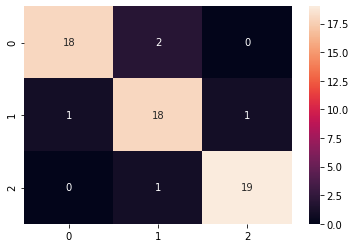

In [50]:
from sklearn.metrics import precision_recall_fscore_support as prf

# LINEAR
model = ovr(SVC(C=0.1, gamma=1, kernel='linear'))

model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
sns.heatmap(confusion_matrix(ytest, ypred), annot = True)
print(classification_report(ytest, ypred))

print(prf(ytest, ypred))

In [51]:
#RBF estimator
svc = SVC(kernel='rbf')
model = ovr(svc)

param_grid = {
    'estimator__gamma': [ 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 10, 100, 1000], 
    'estimator__C': [0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000]
}

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\

{'estimator__C': 0.1, 'estimator__gamma': 1}


C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

      fakhri       0.95      0.95      0.95        20
        jaka       0.89      0.85      0.87        20
        riyo       0.90      0.95      0.93        20

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

(array([0.95      , 0.89473684, 0.9047619 ]), array([0.95, 0.85, 0.95]), array([0.95      , 0.87179487, 0.92682927]), array([20, 20, 20], dtype=int64))


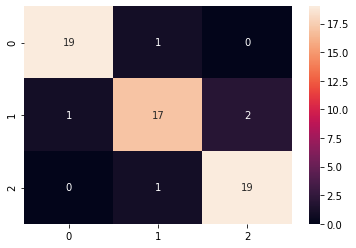

In [52]:
# RBF

model = ovr(SVC(C=0.1, gamma='scale', kernel='rbf'))

model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
sns.heatmap(confusion_matrix(ytest, ypred), annot = True)
print(classification_report(ytest, ypred))

print(prf(ytest, ypred))

In [53]:
#Polynomial estimator
svc = SVC(kernel='poly')
model = ovr(svc)

param_grid = {
    'estimator__gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 10, 100, 1000], 
    'estimator__C': [0.1, 0.01, 0.001, 0.0001, 1, 10, 100, 1000]
}

grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(Xtrain, ytrain)
print(grid.best_params_)



C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\

{'estimator__C': 10, 'estimator__gamma': 'scale'}


C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


C:\Users\AHNAF BASIL MUBAROK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

      fakhri       1.00      0.45      0.62        20
        jaka       0.60      0.75      0.67        20
        riyo       0.73      0.95      0.83        20

    accuracy                           0.72        60
   macro avg       0.78      0.72      0.70        60
weighted avg       0.78      0.72      0.70        60

(array([1.        , 0.6       , 0.73076923]), array([0.45, 0.75, 0.95]), array([0.62068966, 0.66666667, 0.82608696]), array([20, 20, 20], dtype=int64))


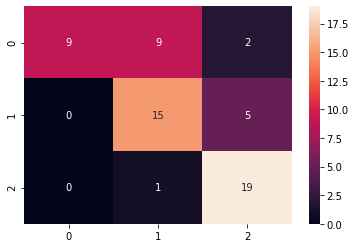

In [54]:
# polynomial
model = ovr(SVC(C=10, gamma='scale', kernel='poly'))

model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
sns.heatmap(confusion_matrix(ytest, ypred), annot = True)
print(classification_report(ytest, ypred))

print(prf(ytest, ypred))